# **Take-Home Exam 1 (THE-1)**
## CENG403 - Spring 2025

In this THE, we will focus on implementing a Multi-layer Perceptron from scratch and in PyTorch with two tasks:

*   Task 1: Implementing your own MLP from scratch (40 pts).
*   Task 2: Implementing MLP in PyTorch (60 pts).

**Getting Ready**

You can use the following tutorials to familiarize yourself with some libraries/tools.

*   **Jupyter Notebook and Colab**:
 * https://www.dataquest.io/blog/jupyter-notebook-tutorial/
 * https://colab.research.google.com/
 * We recommend using colab.
*   **NumPy**: https://numpy.org/devdocs/user/quickstart.html
*   **PyTorch**: https://pytorch.org/tutorials/beginner/deep_learning_60min_blitz.html


## **Task 1: Implement Your Own MLP (40 Points)**

In this task, you are responsible for implementing the following sub-tasks:


*   Implementing Activation Functions (10 Points)
*   Implementing Training Pipeline (30 Points)

**Note that you should implement all functions from scratch! Using PyTorch or any other libraries except for `numpy` in your implementation will be evaluated as 0 (zero).**


### **1.1 Implement forward pass for activations (5 Points)**

In this part, you are expected to implement the forward pass for the following activation functions:

 $$
\text{ReLU}(x) = \max(0, x)
$$

$$
\text{Sigmoid}(x) = \frac{1}{1 + e^{-x}}
$$

$$
\text{Tanh}(x) = \frac{e^x - e^{-x}}{e^x + e^{-x}}
$$

$$
\text{Leaky ReLU}(x) =
\begin{cases}
    x, & x \geq 0 \\
    \alpha x, & x < 0
\end{cases}
$$

$$
\text{ELU}(x) =
\begin{cases}
    x, & x \geq 0 \\
    \alpha (e^x - 1), & x < 0
\end{cases}
$$


In [3]:
import numpy as np

def relu(x):
  #####################################################
  # @TODO: Modify 'result' so that it stores the correct value
  result = np.maximum(0, x)
  #####################################################
  return result

def sigmoid(x):
  #####################################################
  # @TODO: Modify 'result' so that it stores the correct value
  result = 1 / (1 + np.exp(-x))
  #####################################################
  return result

def tanh(x):
  #####################################################
  # @TODO: Modify 'result' so that it stores the correct value
  result = np.tanh(x)
  #####################################################
  return result

def leakyrelu(x, alpha):
  #####################################################
  # @TODO: Modify 'result' so that it stores the correct value
  result = np.where(x >= 0, x, alpha * x)
  #####################################################
  return result

def elu(x, alpha):
  #####################################################
  # @TODO: Modify 'result' so that it stores the correct value
  result = np.where(x >= 0, x, alpha * (np.exp(x) - 1))
  #####################################################
  return result

### **1.2 Implement backward pass for activations (5 Points)**

In this part, you are expected to derive the gradients of the activation functions in Section 1.1 (you are not expected to provide your derivations here) and to implement those gradients.


In [4]:
def relu_derivate(x):
  ###########################################################################
  # @TODO: Modify 'result' so that it stores the correct value
  # 1 if x > 0, 0 otherwise
  # converting to boolean array and float convert into 0s and 1s
  result = (x > 0).astype(float)
  ###########################################################################
  return result

def sigmoid_derivate(x):
  ###########################################################################
  # @TODO: Modify 'result' so that it stores the correct value
  sig = sigmoid(x)
  result = sig * (1 - sig)
  result = result
  ###########################################################################
  return result

def tanh_derivate(x):
  ###########################################################################
  # @TODO: Modify 'result' so that it stores the correct value
  t = np.tanh(x)
  result = 1 -t**2
  result = result
  ###########################################################################
  return result

def leakyrelu_derivate(x, alpha):
  ###########################################################################
  # @TODO: Modify 'result' so that it stores the correct value
  result = np.where(x >= 0, 1, alpha)
  ###########################################################################
  return result

def elu_derivate(x, alpha):
  ###########################################################################
  # @TODO: Modify 'result' so that it stores the correct value
  result = np.where(x >= 0, 1, alpha * np.exp(x))
  ###########################################################################
  return result

### **1.3 Validate Implementations in Sections 1.1 and 1.2**

Run the following cell to validate/check whether your implementations in Sections 1.1 and 1.2 are correct. You will see your grade calculated for this part.

**Do not change/add any code here.**

In [5]:
import torch
import torch.nn as nn
import torch.nn.functional as F

points = 0

#define variables
x_numpy = np.random.randn(5, 5).astype(np.float32)
x_torch = torch.tensor(x_numpy, requires_grad=True)

alpha_leakyrelu = 0.3
alpha_elu = 0.5

class SimpleModel(nn.Module):
    def __init__(self, activation):
        super(SimpleModel, self).__init__()
        self.dummy_param = torch.nn.Parameter(torch.ones(1))
        self.activation = activation

    def forward(self, x):
      return self.activation(x * self.dummy_param)

# Activation functions
activations = {
    'relu': F.relu,
    'tanh': torch.tanh,
    'sigmoid': torch.sigmoid,
    'elu': lambda x: F.elu(x, alpha=alpha_elu),
    'leaky_relu': lambda x: F.leaky_relu(x, negative_slope=alpha_leakyrelu)
}

numpy_gradients = {
    'relu': relu_derivate,
    'tanh': tanh_derivate,
    'sigmoid': sigmoid_derivate,
    'elu': elu_derivate,
    'leaky_relu': leakyrelu_derivate
}

numpy_forward = {
    'relu': relu,
    'tanh': tanh,
    'sigmoid': sigmoid,
    'elu': elu,
    'leaky_relu': leakyrelu
}

# Compare gradients
for name, activation in activations.items():
    model = SimpleModel(activation)
    optimizer = torch.optim.SGD(model.parameters(), lr=0.1)
    output_torch = model(x_torch)

    # Compute numpy forward and gradients
    if name == 'elu':
        numpy_out = numpy_forward[name](x_numpy, alpha=alpha_elu)
        numpy_grad = numpy_gradients[name](x_numpy, alpha=alpha_elu)
    elif name == 'leaky_relu':
        numpy_out = numpy_forward[name](x_numpy, alpha=alpha_leakyrelu)
        numpy_grad = numpy_gradients[name](x_numpy, alpha=alpha_leakyrelu)
    else:
        numpy_out = numpy_forward[name](x_numpy)
        numpy_grad = numpy_gradients[name](x_numpy)

    # Compare forward pass
    print(f"Forward pass comparison for {name} activation:")
    print("Forward difference: ", np.allclose(numpy_out, output_torch.detach().numpy(), atol=1e-6))

    if np.allclose(numpy_out, output_torch.detach().numpy(), atol=1e-6): points +=1

    output_torch.sum().backward()
    torch_grad = x_torch.grad.numpy()

    # Compare gradients
    print(f"Gradient (backward pass) comparison for {name} activation :")
    print("Gradient difference: ", np.allclose(numpy_grad, torch_grad, atol=1e-6))
    if np.allclose(numpy_grad, torch_grad, atol=1e-6): points += 1

    print("-" * 30)

    #clear gradients of pytorch
    optimizer.zero_grad()
    x_torch.grad.zero_()

print("Total points:",points,"/ 10")

Forward pass comparison for relu activation:
Forward difference:  True
Gradient (backward pass) comparison for relu activation :
Gradient difference:  True
------------------------------
Forward pass comparison for tanh activation:
Forward difference:  True
Gradient (backward pass) comparison for tanh activation :
Gradient difference:  True
------------------------------
Forward pass comparison for sigmoid activation:
Forward difference:  True
Gradient (backward pass) comparison for sigmoid activation :
Gradient difference:  True
------------------------------
Forward pass comparison for elu activation:
Forward difference:  True
Gradient (backward pass) comparison for elu activation :
Gradient difference:  True
------------------------------
Forward pass comparison for leaky_relu activation:
Forward difference:  True
Gradient (backward pass) comparison for leaky_relu activation :
Gradient difference:  True
------------------------------
Total points: 10 / 10


### **1.4 Implement a Training Pipeline (30 Points)**

In this part, you should implement the following two-layer neural network for a binary classification problem (given input-output pair $(\mathbf{x}_i, y_i)$):

$$ \mathbf{z}_1 = W^1 \mathbf{x}_i + \mathbf{b}^1,$$
$$ \mathbf{h} = \textrm{relu}(\mathbf{z}_1),$$
$$ z_2 = W^2 \mathbf{h} + \mathbf{b}^2,$$
$$ p_i = \textrm{sigmoid}(z_2),$$

where we assume that relu() and sigmoid() are applied elementwise to their arguments. Note that $z_2$ is a scalar variable.

You should use the binary cross-entropy loss ($N$ denoting the number of samples):
$$ L_{BCE} = -\frac{1}{N} \sum_{i=1}^{N} \left[ y_i \log (p_i) + (1 - y_i) \log (1 - p_i) \right].$$

You should use gradient descent to update the parameters:
$$ w_{ij} = w_{ij} - \eta \frac{\partial L}{\partial w_{ij}} ,$$ where $\eta$ is the learning rate.


In [6]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim

# Forward Propagation
def forward_propagation(X, W1, b1, W2, b2):
    ###########################################################################
    # @TODO: Fill in this part to calculate the following variables
    # -- Z1: the outout of the first layer
    Z1 = np.dot(X, W1)+b1
    # -- h: the output of the first layer after relu
    h = relu(Z1)
    # -- Z2: the output of the second layer
    Z2 = np.dot(h, W2)+b2
    # -- p_i: the output of second layer after sigmoid
    p_i = sigmoid(Z2)
    pass
    ###########################################################################

    # do not modify following lines
    cache = (Z1, h, Z2, p_i)
    return p_i, cache

# Loss Function (Binary Cross-Entropy)
def compute_loss(y, p_i):
    ###########################################################################
    # @TODO: Modify result so that it computes binary CE
    epsilon = 1e-15
    p_i = np.clip(p_i, epsilon, 1 - epsilon)

    N = y.shape[0]
    result = -1 /N * np.sum(y * np.log(p_i) + (1 - y) * np.log(1 - p_i))
    ###########################################################################
    return result

# Backpropagation
def backward_propagation(X, y, cache, W2):
    Z1, h, Z2, p_i = cache # Do not modify
    N = X.shape[0] #num of samples

    ###########################################################################
    # @TODO: Fill in this part so that the following variables are calculated
    # -- dW1 and b1 are gradients of weight matrix and bias for the first layer
    # -- dW2 and b2 are gradients of weight matrix and bias for the second layer

    dZ2 = p_i - y

    dW2 = 1/N * np.dot(h.T, dZ2)
    db2 = 1/N * np.sum(dZ2, axis=0, keepdims=True)

    dh = np.dot(dZ2, W2.T)
    dZ1 = dh * relu_derivate(Z1)


    dW1 = 1/N * np.dot(X.T, dZ1)
    db1 = 1/N * np.sum(dZ1, axis=0, keepdims=True)
    ###########################################################################

    # do not modify following part
    gradients = (dW1, db1, dW2, db2)

    return gradients

# Update Parameters
def update_parameters(W1, b1, W2, b2, gradients, learning_rate):
    dW1, db1, dW2, db2 = gradients # Do not modify

    ###########################################################################
    # @TODO: Fill in this part so that the following variables are calculated
    # -- W1 and b1 are the weight matrix and bias for the first layer
    # -- W2 and b2 are the weight matrix and bias for the second layer

    W1 = W1 - learning_rate * dW1
    b1 = b1 - learning_rate * db1
    W2 = W2 - learning_rate * dW2
    b2 = b2 - learning_rate * db2
    ###########################################################################

    # do not modify following part
    return W1, b1, W2, b2




### **1.5 Validate Implementation in Section 1.4**

This part is only to validate your implementation in Section 1.4 and see your grade.

**Do not modify/add any code here!**

In [7]:
grades_1_5 = 0
# DO NOT modify here
# XOR Dataset
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([[0], [1], [1], [0]])

# Hyperparameters
input_size = 2
hidden_size = 3
output_size = 1
learning_rate = 0.01

# --- PyTorch Model for Weight Sharing ---
class TwoLayerMLP(nn.Module):
    def __init__(self):
        super(TwoLayerMLP, self).__init__()
        self.hidden = nn.Linear(input_size, hidden_size)
        self.output = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        x = torch.relu(self.hidden(x))
        x = torch.sigmoid(self.output(x))
        return x

# Instantiate Model
model = TwoLayerMLP()

# Extract Weights from PyTorch and Share with NumPy
W1 = model.hidden.weight.detach().numpy().T.copy()  # Transpose to match NumPy's dot product order
b1 = model.hidden.bias.detach().numpy().reshape(1, -1).copy()
W2 = model.output.weight.detach().numpy().T.copy()
b2 = model.output.bias.detach().numpy().reshape(1, -1).copy()

# Forward Propagation (NumPy)
p_i, cache = forward_propagation(X, W1, b1, W2, b2)

# Compute Loss (NumPy)
loss_numpy = compute_loss(y, p_i)

# Backpropagation (NumPy)
gradients = backward_propagation(X, y, cache, W2)

# --- PyTorch Verification ---
print("\n--- PyTorch Verification ---")

# Convert Data to Torch Tensors
X_tensor = torch.FloatTensor(X)
y_tensor = torch.FloatTensor(y)

# Forward Pass in PyTorch
output = model(X_tensor)
criterion = nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
loss_torch = criterion(output, y_tensor)
optimizer.zero_grad()
loss_torch.backward()
optimizer.step()


W1, b1, W2, b2 = update_parameters(W1, b1, W2, b2, gradients, learning_rate)

# Forward Comparison
print("Forward comparison:")
print("Forward difference:", np.allclose(p_i, output.detach().cpu().numpy(), atol=1e-6))
if np.allclose(p_i, output.detach().cpu().numpy(), atol=1e-6):
  grades_1_5 += 5.

# Loss Comparison
print("Loss comparison:")
print("Loss difference:", np.allclose(loss_numpy, loss_torch.detach().cpu().numpy(), atol=1e-6))
if np.allclose(loss_numpy, loss_torch.detach().cpu().numpy(), atol=1e-6):
  grades_1_5 += 5.

# Backward Comparison
print("\nGradients Comparison:")
print("dW1 difference:", np.allclose(gradients[0], model.hidden.weight.grad.numpy().T, atol=1e-6))
if np.allclose(gradients[0], model.hidden.weight.grad.numpy().T, atol=1e-6):
  grades_1_5 += 2.5
print("db1 difference:", np.allclose(gradients[1], model.hidden.bias.grad.numpy().reshape(1, -1), atol=1e-6))
if np.allclose(gradients[1], model.hidden.bias.grad.numpy().reshape(1, -1), atol=1e-6):
  grades_1_5 += 2.5
print("dW2 difference:", np.allclose(gradients[2], model.output.weight.grad.numpy().T, atol=1e-6))
if np.allclose(gradients[2], model.output.weight.grad.numpy().T, atol=1e-6):
  grades_1_5 += 2.5
print("db2 difference:", np.allclose(gradients[3], model.output.bias.grad.numpy().reshape(1, -1), atol=1e-6))
if np.allclose(gradients[3], model.output.bias.grad.numpy().reshape(1, -1), atol=1e-6):
  grades_1_5 += 2.5

# Parameter Update Comparison
print("\nParameter Comparison after updating:")
print("W1 difference:", np.allclose(W1, model.hidden.weight.detach().numpy().T, atol=1e-6))
if np.allclose(W1, model.hidden.weight.detach().numpy().T, atol=1e-6):
  grades_1_5 += 2.5
print("b1 difference:", np.allclose(b1, model.hidden.bias.detach().numpy().reshape(1, -1), atol=1e-6))
if np.allclose(b1, model.hidden.bias.detach().numpy().reshape(1, -1), atol=1e-6):
  grades_1_5 += 2.5
print("W2 difference:", np.allclose(W2, model.output.weight.detach().numpy().T, atol=1e-6))
if np.allclose(W2, model.output.weight.detach().numpy().T, atol=1e-6):
  grades_1_5 += 2.5
print("b2 difference:", np.allclose(b2, model.output.bias.detach().numpy().reshape(1, -1), atol=1e-6))
if np.allclose(b2, model.output.bias.detach().numpy().reshape(1, -1), atol=1e-6):
  grades_1_5 += 2.5

print("Total points:", grades_1_5, "/ 30.0")


--- PyTorch Verification ---
Forward comparison:
Forward difference: True
Loss comparison:
Loss difference: True

Gradients Comparison:
dW1 difference: True
db1 difference: True
dW2 difference: True
db2 difference: True

Parameter Comparison after updating:
W1 difference: True
b1 difference: True
W2 difference: True
b2 difference: True
Total points: 30.0 / 30.0


## **Task 2: Implement MLP in PyTorch (60 Points)**

In this task, you are expected to implement a training, validation and testing pipeline using PyTorch.

You will work with an imbalanced version of the well-known MNIST dataset which we've prepared for you. In this dataset, there are three splits: train, validation and test. Each split contains 10 directories and each directory represents one class. Therefore, there are 10 classes in total.


### **2.1 Download Dataset**

Your dataset is an imbalanced version of MNIST. Run the following code to download and extract dataset.

In [8]:
!wget -O mnist_png.zip https://github.com/Bedrettin-Cetinkaya/imbalancedMNIST/raw/refs/heads/main/mnist_png.zip
!unzip mnist_png.zip

Streaming output truncated to the last 5000 lines.
 extracting: mnist_png/validation/0/57420.png  
 extracting: mnist_png/validation/0/57435.png  
 extracting: mnist_png/validation/0/57451.png  
 extracting: mnist_png/validation/0/57471.png  
 extracting: mnist_png/validation/0/57486.png  
 extracting: mnist_png/validation/0/57491.png  
 extracting: mnist_png/validation/0/57494.png  
 extracting: mnist_png/validation/0/57507.png  
 extracting: mnist_png/validation/0/57525.png  
 extracting: mnist_png/validation/0/57536.png  
 extracting: mnist_png/validation/0/57542.png  
 extracting: mnist_png/validation/0/57543.png  
 extracting: mnist_png/validation/0/57558.png  
  inflating: mnist_png/validation/0/57575.png  
 extracting: mnist_png/validation/0/57586.png  
 extracting: mnist_png/validation/0/57595.png  
 extracting: mnist_png/validation/0/57601.png  
 extracting: mnist_png/validation/0/57629.png  
 extracting: mnist_png/validation/0/57634.png  
 extracting: mnist_png/validation/0/5

### **2.2 Implement Data Loader (5 Points)**

In this task, you should create a custom dataset class (`MNISTCustomDataset`) to load MNIST images from a directory structure. The dataset reads images, extracts labels from folder names, and applies transformations like converting to tensors and normalization.

We use `DataLoader`s to efficiently load data in batches:

*    Training `DataLoader`: Loads shuffled batches for better model learning.
*    Validation & Test `DataLoader`s: Load images without shuffling for consistent evaluation

In [9]:
import torch
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms
from PIL import Image
import os
import glob

class MNISTCustomDataset(Dataset):
    def __init__(self, data_dir, transform=None):
        self.data_dir = data_dir
        self.transform = transform

        #####################################################
        # @TODO: Load image file paths and labels
        self.images = []  # List to store image file paths
        self.labels = []  # List to store corresponding labels

        # HINT: You can use os.listdir or glob library to get file paths
        # HINT: You should extract the label from image file path

        for class_folder in os.listdir(data_dir):
            class_dir = os.path.join(data_dir, class_folder)
            # not directory -> skip
            if not os.path.isdir(class_dir):
                continue
            # label from folder name
            label = int(class_folder)

            # all image paths
            image_paths = glob.glob(os.path.join(class_dir, "*.png"))
            self.images.extend(image_paths)
            self.labels.extend([label] * len(image_paths))
        #####################################################

    def __len__(self):
        #####################################################
        # @TODO: Return the number of samples in dataset
        return len(self.images)
        #####################################################

    def __getitem__(self, idx):
        #####################################################
        # @TODO: Load the image and label using the index
        # HINT: Use PIL.Image.open to load images

        # image = ...
        # label = ...
        image_path = self.images[idx]
        label = self.labels[idx]
        image = Image.open(image_path).convert('L') #we also convert to greyscale
        #####################################################

        # Apply transformation if available
        if self.transform:
            image = self.transform(image)

        return image, label


# Define transformations
transform_train = transforms.Compose([
    #####################################################
    # @TODO: You can add your data augmentations here
    # HINT: Do not forget to convert images to tensor

    # Data augmentations for training
    transforms.RandomRotation(10), #rotations
    transforms.RandomAffine(0, translate=(0.1, 0.1)), #shifts
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,))
    #####################################################
])

transform_validationAndtest = transforms.Compose([
    #####################################################
    # HINT: Do not forget to convert images to tensor

    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,))
    #####################################################

])

#####################################################
# @TODO: Provide the correct path for the dataset splits
data_dir_training = "mnist_png/training"
data_dir_validation = "mnist_png/validation"
data_dir_testing = "mnist_png/testing"
#####################################################

# Create dataset instance
train_dataset = MNISTCustomDataset(data_dir=data_dir_training, transform=transform_train)
validation_dataset = MNISTCustomDataset(data_dir=data_dir_validation, transform=transform_validationAndtest)
test_dataset = MNISTCustomDataset(data_dir=data_dir_testing, transform=transform_validationAndtest)

# Create DataLoader
batch_size = 10  # set your batch size
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(validation_dataset, batch_size=1, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=1, shuffle=False)

# Check DataLoaders
images, labels = next(iter(train_loader))
print(f"Train Batch shape: {images.shape}, Labels shape: {labels.shape}")

images, labels = next(iter(val_loader))
print(f"Validation Batch shape: {images.shape}, Labels shape: {labels.shape}")

images, labels = next(iter(test_loader))
print(f"Test Batch shape: {images.shape}, Labels shape: {labels.shape}")

Train Batch shape: torch.Size([10, 1, 28, 28]), Labels shape: torch.Size([10])
Validation Batch shape: torch.Size([1, 1, 28, 28]), Labels shape: torch.Size([1])
Test Batch shape: torch.Size([1, 1, 28, 28]), Labels shape: torch.Size([1])


### **2.3 Implement Model (5 Points)**
In this task, you are expected to implement CustomMLP class. There is no restriction in MLP architecture.However, **You should use at least one dropout layer!**

In [10]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class CustomMLP(nn.Module):
    def __init__(self, input_size, output_size, dropout_rate=0.3):
        super(CustomMLP, self).__init__()

        #####################################################
        # @TODO: Define layers of MLP, there is no restriction for its architecture
        # You should use at least one dropout layer!
        # HINT: Use nn.Linear for fully connected layers

        self.fc1 = nn.Linear(input_size, 256)
        self.bn1 = nn.BatchNorm1d(256)

        self.fc2 = nn.Linear(256, 128)
        self.bn2 = nn.BatchNorm1d(128)

        self.fc3 = nn.Linear(128, 64)
        self.bn3 = nn.BatchNorm1d(64)

        self.fc4 = nn.Linear(64, output_size)

        self.dropout = nn.Dropout(dropout_rate)
        #####################################################

    def forward(self, x):
        #####################################################
        # @TODO: Implement the forward pass
        # HINT: Apply activation functions like ReLU where necessary
        x = x.view(x.size(0), -1)

        x = self.fc1(x)
        x = self.bn1(x)
        x = F.relu(x)

        x = self.dropout(x)

        x = self.fc2(x)
        x = self.bn2(x)
        x = F.relu(x)

        x = self.dropout(x)

        x = self.fc3(x)
        x = self.bn3(x)
        x = F.relu(x)

        x = self.fc4(x)
        #####################################################

        return x

#####################################################
# @TODO: Define the following model parameters
input_size = 28 * 28  # MNIST images are 28x28
output_size = 10  # MNIST has 10 classes
#####################################################

# Create model instance
model = CustomMLP(input_size, output_size)

# Print model summary
print(model)

CustomMLP(
  (fc1): Linear(in_features=784, out_features=256, bias=True)
  (bn1): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fc2): Linear(in_features=256, out_features=128, bias=True)
  (bn2): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fc3): Linear(in_features=128, out_features=64, bias=True)
  (bn3): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fc4): Linear(in_features=64, out_features=10, bias=True)
  (dropout): Dropout(p=0.3, inplace=False)
)


###**2.4 Define Your Optimizer and Loss function**
This task involves setting up a loss function and an optimizer for training a model. The loss function measures prediction accuracy. The optimizer, such as SGD or Adam, updates model weights based on the loss. Key parameters like learning rate and weight decay should be set appropriately. The model must also be moved to the correct device (CPU/GPU) before training.

In [11]:
import torch.optim as optim

#####################################################
# @TODO: Define a loss function
loss_function = nn.CrossEntropyLoss()  # Replace with appropriate loss function for our classification task
#####################################################

#####################################################
# @TODO: Choose an optimizer
# HINT: Use optim.SGD or optim.Adam
# I'll choose Adam as it generally converges faster and requires less tuning
#####################################################
#####################################################
# @TODO: Set your learning_rate, weight_decay or other optimizer-related parameters.
learning_rate = 0.001
weight_decay = 1e-5
#####################################################

#####################################################
# @TODO: Replace with your model instance
model = CustomMLP(input_size=28*28, output_size=10)
#####################################################
#####################################################
# @TODO: pass model to device (CPU or GPU)
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model = model.to(device)
#####################################################

#####################################################
# Define optimizer
optimizer = optim.Adam(model.parameters(), lr=learning_rate, weight_decay=weight_decay) # @TODO: Replace with an appropriate optimizer
#####################################################

# Print optimizer and loss function
print("Loss Function:", loss_function)
print("Optimizer:", optimizer)

Loss Function: CrossEntropyLoss()
Optimizer: Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    capturable: False
    differentiable: False
    eps: 1e-08
    foreach: None
    fused: None
    lr: 0.001
    maximize: False
    weight_decay: 1e-05
)


###**2.5 Optional Steps**
You can use here for additional codes/implementations if you need.

In [12]:
# You can use this cell for additional steps if you need.

### **2.6 Implement Training Pipeline (10 Points)**

This task involves implementing training and validation loops for a model.

* The `train()` function:
 * Iterates through the training data (`train_loader`).
 * For each batch, extracts images and labels, moves them to the appropriate device (CPU/GPU), performs a forward pass (calculates predictions and loss), and performs the backward pass (computes gradients and updates the model weights).
 * Returns the average training loss.

* The `validate()` function:
 * Iterates through the validation data (`val_loader`) without updating the model weights (using `torch.no_grad()`).
 * Computes predictions, loss, and calculates accuracy by comparing predictions with true labels.
 * Returns the average validation loss and accuracy.


* These functions should be called in a loop for multiple epochs. You need to store and print the loss and accuracy values for both training and validation after each epoch to track model performance.

In [13]:
def train(model, train_loader, optimizer, loss_function, device):

    # get the model to training mode
    model.train()
    total_loss = 0

    for batch in train_loader:

        #####################################################
        # @TODO: get images and their labels from the batch
        images, labels = batch

        # Check if batch size is > 1 for batch normalization
        if images.size(0) <= 1:
            continue

        # @TODO: pass your tensor to your device (CPU or GPU)
        images = images.to(device)
        labels = labels.to(device)

        # @TODO: Implement forward pass
        # HINT: Compute predictions and loss
        optimizer.zero_grad()

        outputs = model(images)
        loss = loss_function(outputs, labels)
        total_loss += loss.item()

        # @TODO: Implement backward pass and optimization step
        # HINT: Clear gradients, backpropagate, and update weights
        loss.backward()

        optimizer.step()
        #####################################################

    return total_loss / len(train_loader)

def validate(model, val_loader, loss_function, device):

    # get the model to evaluation mode
    model.eval()
    total_loss = 0
    correct = 0

    with torch.no_grad():
        for batch in val_loader:
            #####################################################
            # @TODO: extract images and label from batch
            images, labels = batch

            # TODO: pass your tensor to your device(CPU/GPU)
            images = images.to(device)
            labels = labels.to(device)

            # TODO: Implement validation forward pass
            # HINT: Compute predictions and loss
            outputs = model(images)
            loss = loss_function(outputs, labels)
            total_loss += loss.item()

            # TODO: Calculate accuracy
            # HINT: Compare predictions with labels
            _, predicted = torch.max(outputs, 1)
            correct += (predicted == labels).sum().item()
            #####################################################

    accuracy = correct / len(val_loader) * 100
    return total_loss / len(val_loader), accuracy

#####################################################
# @TODO: Call train and validate functions in a loop for multiple epochs
# @TODO: Store loss value and accuracy of training and validation data for each epoch.


train_losses = []
val_losses = []
val_accuracies = []

#epochs
num_epochs = 10

# Training loop
print("Starting training...")
for epoch in range(num_epochs):
    # Train the model
    train_loss = train(model, train_loader, optimizer, loss_function, device)
    train_losses.append(train_loss)

    # Validate the model
    val_loss, val_accuracy = validate(model, val_loader, loss_function, device)
    val_losses.append(val_loss)
    val_accuracies.append(val_accuracy)

    # Print metrics
    print(f'Epoch [{epoch+1}/{num_epochs}], '
          f'Train Loss: {train_loss:.4f}, '
          f'Val Loss: {val_loss:.4f}, '
          f'Val Accuracy: {val_accuracy:.2f}%')
#####################################################

Starting training...
Epoch [1/10], Train Loss: 0.8931, Val Loss: 0.3427, Val Accuracy: 89.67%
Epoch [2/10], Train Loss: 0.6384, Val Loss: 0.2385, Val Accuracy: 93.70%
Epoch [3/10], Train Loss: 0.5614, Val Loss: 0.2002, Val Accuracy: 94.48%
Epoch [4/10], Train Loss: 0.5213, Val Loss: 0.1854, Val Accuracy: 94.53%
Epoch [5/10], Train Loss: 0.4926, Val Loss: 0.1572, Val Accuracy: 96.22%
Epoch [6/10], Train Loss: 0.4674, Val Loss: 0.1685, Val Accuracy: 95.67%
Epoch [7/10], Train Loss: 0.4490, Val Loss: 0.1789, Val Accuracy: 95.67%
Epoch [8/10], Train Loss: 0.4322, Val Loss: 0.1303, Val Accuracy: 97.03%
Epoch [9/10], Train Loss: 0.4236, Val Loss: 0.1327, Val Accuracy: 96.48%
Epoch [10/10], Train Loss: 0.4219, Val Loss: 0.1615, Val Accuracy: 95.46%


### **2.7 Plot Loss Curves, Confusion Matrix (10 Points and Report Test Accuracy)**
In this task, you should plot both the training and validation loss versus the epoch in a single graph. Additionally, you should compute the confusion matrix for the validation data using **only NumPy. Using a pre-built library for computing confusion matrix is not allowed.** You should also compute test accuracy.












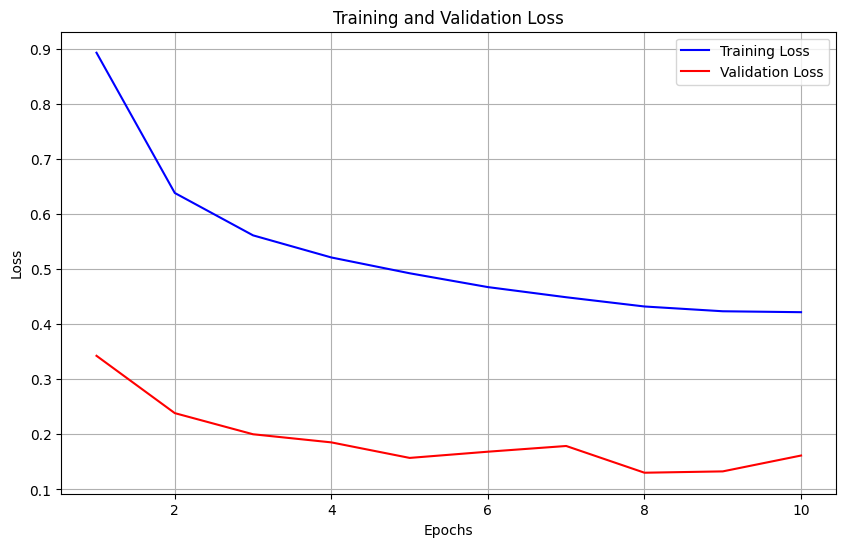

Confusion Matrix of Validation Data:
[[539   1   1   1   0   0   0   0   4   1]
 [  0 496   2   1   1   0   0   2   2   0]
 [  1  19 479  10   3   2   1  13  19   0]
 [  0   9   0 494   0   2   0   7   6   1]
 [  0   1   0   0 501   0   1   0   0   2]
 [  1   4   0  15   2 473   4   0   6   0]
 [  0   4   0   0   0   2 498   0   1   0]
 [  1   2   2   0   2   0   0 540   0   0]
 [  0   6   0   0   2   2   1   1 521   0]
 [  3   3   0  10  37   1   0   2  13 505]]
Validation Accuracy: 96.17%
Test Accuracy: 96.17%


In [14]:
import matplotlib.pyplot as plt


def plot_loss(train_losses, val_losses):
    # train_losses = [] # List to store training losses for each epoch
    # val_losses = []   # List to store validation losses for each epoch

    #####################################################
    # TODO: plot the training and validation loss
    plt.figure(figsize=(10, 6))
    plt.plot(range(1, len(train_losses) + 1), train_losses, 'b-', label='Training Loss')
    plt.plot(range(1, len(val_losses) + 1), val_losses, 'r-', label='Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title('Training and Validation Loss')
    plt.legend()
    plt.grid(True)
    #####################################################

    plt.show()

def compute_confusion_matrix(predictions, true_labels, num_classes=10):
    confusion_matrix = np.zeros((num_classes, num_classes), dtype=int)
    # predictions = []   # Store model predictions
    # true_labels = []   # Store true labels

    #####################################################
    # TODO: compute confusion matrix using only NumPy
    for i in range(len(true_labels)):
      true_label = true_labels[i]
      pred_label = predictions[i]
      confusion_matrix[true_label, pred_label] += 1
    #####################################################

    return confusion_matrix

def report_accuracy(test_loader, model):
    correct = 0
    total = 0

    all_predictions = []
    all_labels = []

    with torch.no_grad():
        model.eval()
        for batch in test_loader: # start a loop over test_loader
            #####################################################
            # @TODO: get images and their labels from batch

            images, labels = batch # fix the typo on images

            # @TODO: pass your tensor to your device( CPU/GPU)
            images = images.to(device)
            labels = labels.to(device)

            # @TODO: Implement validation forward pass
            # HINT: Compute predictions and loss
            outputs = model(images)

            # @TODO: Calculate accuracy
            # HINT: Compare predictions with labels
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

            all_predictions.extend(predicted.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())

            #####################################################

    accuracy = (correct / total) * 100
    print(f'Validation Accuracy: {accuracy:.2f}%')

    # Return accuracy and also predictions/labels for confusion matrix
    return accuracy, all_predictions, all_labels

val_predictions = []
val_true_labels = []

with torch.no_grad():
    model.eval()
    for images, labels in val_loader:
        images = images.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)
        val_predictions.extend(predicted.cpu().numpy())
        val_true_labels.extend(labels.numpy())

# call plot_loss and compute_confusion matrix function with appropriate parameters
plot_loss(train_losses, val_losses)
# Compute and print confusion matrix for validation data
conf_mat = compute_confusion_matrix(val_predictions, val_true_labels)
print("Confusion Matrix of Validation Data:")
print(conf_mat)

# Report test accuracy
test_accuracy, _, _ = report_accuracy(test_loader, model)
print(f"Test Accuracy: {test_accuracy:.2f}%")


### **2.8 Finetune Your Model (30 Points)**

* Search a better **learning rate** and **dropout rate** on validation data. In this search, you are expected to use all possible combinations of the given learning rates and dropout rates. For each combination, you should report validation accuracy. **Do not use any external library for hyper-parameter optimization!**

* For the best parameters, report training, validation and test accuracy values.  

* **Discuss your results** with respect to overfitting/underfitting and the impact of the hyper-parameters.

### **2.8.1 Hyperparameter Optimization (10 points)**
In this part, you should perform hyperparameter optimization using all possible combinations (grid-search) of the given learning rates and dropout rates. For each combination, you should retrain your model from scratch and store the loss and accuracy of validation data. **All remaining settings/parameters should be fixed, except for the learning rate and dropout rate.**


Testing: LR=0.0001, Dropout=0
Epoch 1: Train=0.9956, Val=0.4490, Acc=85.36%
Epoch 2: Train=0.5315, Val=0.2437, Acc=93.83%
Epoch 3: Train=0.4273, Val=0.2283, Acc=92.83%

Testing: LR=0.0001, Dropout=0.1
Epoch 1: Train=1.1024, Val=0.4843, Acc=85.91%
Epoch 2: Train=0.6268, Val=0.2740, Acc=93.21%
Epoch 3: Train=0.5164, Val=0.2295, Acc=93.74%

Testing: LR=0.0001, Dropout=0.2
Epoch 1: Train=1.1962, Val=0.5515, Acc=79.53%
Epoch 2: Train=0.7214, Val=0.3173, Acc=92.02%
Epoch 3: Train=0.6017, Val=0.2521, Acc=93.68%

Testing: LR=0.0001, Dropout=0.5
Epoch 1: Train=1.5173, Val=0.9170, Acc=70.03%
Epoch 2: Train=1.0537, Val=0.6185, Acc=77.00%
Epoch 3: Train=0.9198, Val=0.4868, Acc=84.22%

Testing: LR=0.0001, Dropout=0.8
Epoch 1: Train=2.0036, Val=1.6754, Acc=42.04%
Epoch 2: Train=1.6444, Val=1.3294, Acc=57.19%
Epoch 3: Train=1.4704, Val=1.1031, Acc=64.38%

Testing: LR=0.001, Dropout=0
Epoch 1: Train=0.6768, Val=0.2295, Acc=93.59%
Epoch 2: Train=0.4261, Val=0.1638, Acc=95.06%
Epoch 3: Train=0.3584, Va

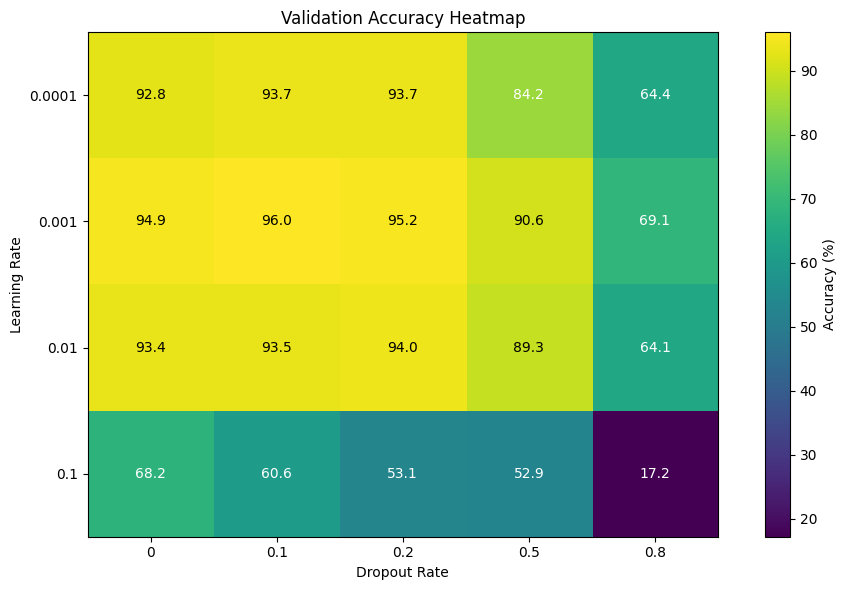

In [15]:
learning_rates = [0.0001, 0.001, 0.01, 0.1]
dropout_rates = [0, 0.1, 0.2, 0.5, 0.8]

# @TODO: implement a nested for loop to make a grid search over the given learning_rates and dropout_rates.

# Track results
results = {}
best_val_accuracy = 0
best_lr = None
best_dropout = None
num_epochs = 3  # Fewer epochs for speed



# Define device
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

# Grid search implementation
for lr in learning_rates:
    for dropout_rate in dropout_rates:
        print(f"\nTesting: LR={lr}, Dropout={dropout_rate}")

        # Create model with the current dropout rate
        model = CustomMLP(input_size, output_size, dropout_rate=dropout_rate).to(device)
        optimizer = optim.Adam(model.parameters(), lr=lr, weight_decay=1e-5)
        loss_function = nn.CrossEntropyLoss()

        # Track metrics
        train_losses = []
        val_losses = []
        val_accuracies = []

        # Train model
        for epoch in range(num_epochs):
            train_loss = train(model, train_loader, optimizer, loss_function, device)
            val_loss, val_accuracy = validate(model, val_loader, loss_function, device)

            # Store results
            train_losses.append(train_loss)
            val_losses.append(val_loss)
            val_accuracies.append(val_accuracy)

            print(f'Epoch {epoch+1}: Train={train_loss:.4f}, Val={val_loss:.4f}, Acc={val_accuracy:.2f}%')

        # Save results
        final_val_accuracy = val_accuracies[-1]
        results[(lr, dropout_rate)] = {
            'train_loss': train_losses[-1],
            'val_loss': val_losses[-1],
            'val_accuracy': final_val_accuracy
        }

        # Update best parameters
        if final_val_accuracy > best_val_accuracy:
            best_val_accuracy = final_val_accuracy
            best_lr = lr
            best_dropout = dropout_rate

# Display results
print(f"\nBest params: LR={best_lr}, Dropout={best_dropout}, Accuracy={best_val_accuracy:.2f}%")

# Create heatmap
import matplotlib.pyplot as plt
import numpy as np

# Build matrix
accuracy_matrix = np.zeros((len(learning_rates), len(dropout_rates)))
for i, lr in enumerate(learning_rates):
    for j, dr in enumerate(dropout_rates):
        accuracy_matrix[i, j] = results.get((lr, dr), {}).get('val_accuracy', 0)

# Plot heatmap
plt.figure(figsize=(10, 6))
plt.imshow(accuracy_matrix, cmap='viridis')
plt.colorbar(label='Accuracy (%)')
plt.xticks(range(len(dropout_rates)), dropout_rates)
plt.yticks(range(len(learning_rates)), learning_rates)
plt.xlabel('Dropout Rate')
plt.ylabel('Learning Rate')
plt.title('Validation Accuracy Heatmap')

# Add labels
for i in range(len(learning_rates)):
    for j in range(len(dropout_rates)):
        plt.text(j, i, f'{accuracy_matrix[i, j]:.1f}',
                 ha="center", va="center",
                 color="white" if accuracy_matrix[i, j] < 85 else "black")

plt.tight_layout()
plt.savefig('hyperparameter_heatmap.png')
plt.show()

### **2.8.2 Choosing best parameters  (5 points)**
You should choose the parameters that give the highest accuracy on the validation data. Then, you should report:
* The training, validation, and test accuracy values.

* Plot training, validation and test losses versus the epoch in single graph.

* Report the confusion matrix for the validation and test data.




Training best model with LR=0.001, Dropout=0.0
Epoch 1: Train Loss=0.6738, Val Loss=0.2603, Val Acc=92.38%, Test Loss=0.2328, Test Acc=93.12%
Epoch 2: Train Loss=0.4267, Val Loss=0.1833, Val Acc=94.31%, Test Loss=0.1693, Test Acc=94.84%
Epoch 3: Train Loss=0.3565, Val Loss=0.1393, Val Acc=96.08%, Test Loss=0.1402, Test Acc=95.83%
Epoch 4: Train Loss=0.3272, Val Loss=0.1541, Val Acc=95.21%, Test Loss=0.1422, Test Acc=95.59%
Epoch 5: Train Loss=0.2941, Val Loss=0.1300, Val Acc=96.22%, Test Loss=0.1174, Test Acc=96.61%
Epoch 6: Train Loss=0.2767, Val Loss=0.1053, Val Acc=96.95%, Test Loss=0.1011, Test Acc=96.92%
Epoch 7: Train Loss=0.2689, Val Loss=0.1176, Val Acc=96.67%, Test Loss=0.1037, Test Acc=97.02%
Epoch 8: Train Loss=0.2592, Val Loss=0.1023, Val Acc=97.07%, Test Loss=0.0929, Test Acc=97.39%
Epoch 9: Train Loss=0.2416, Val Loss=0.1010, Val Acc=96.90%, Test Loss=0.0966, Test Acc=97.21%
Epoch 10: Train Loss=0.2340, Val Loss=0.0886, Val Acc=97.35%, Test Loss=0.0825, Test Acc=97.56%


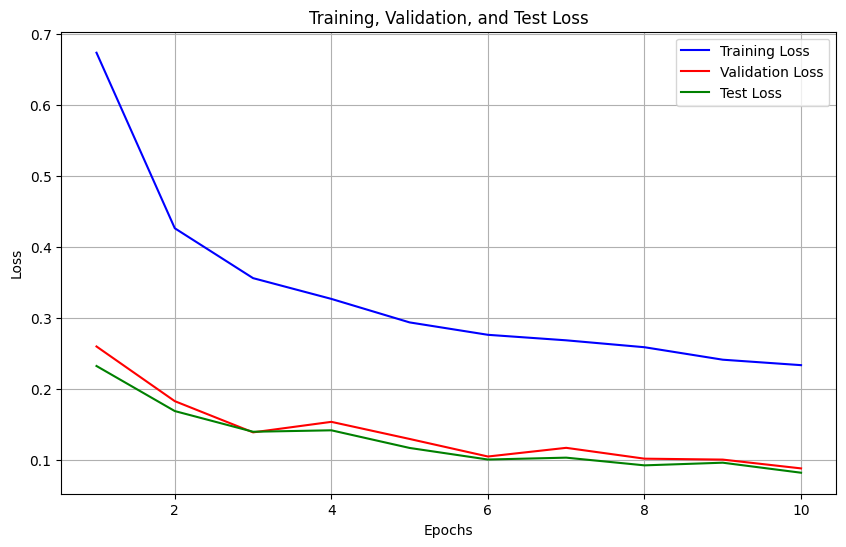

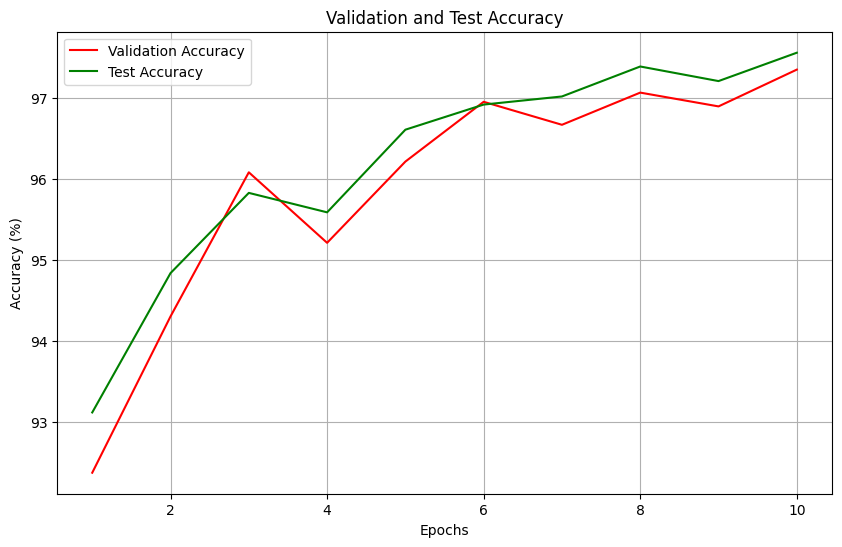

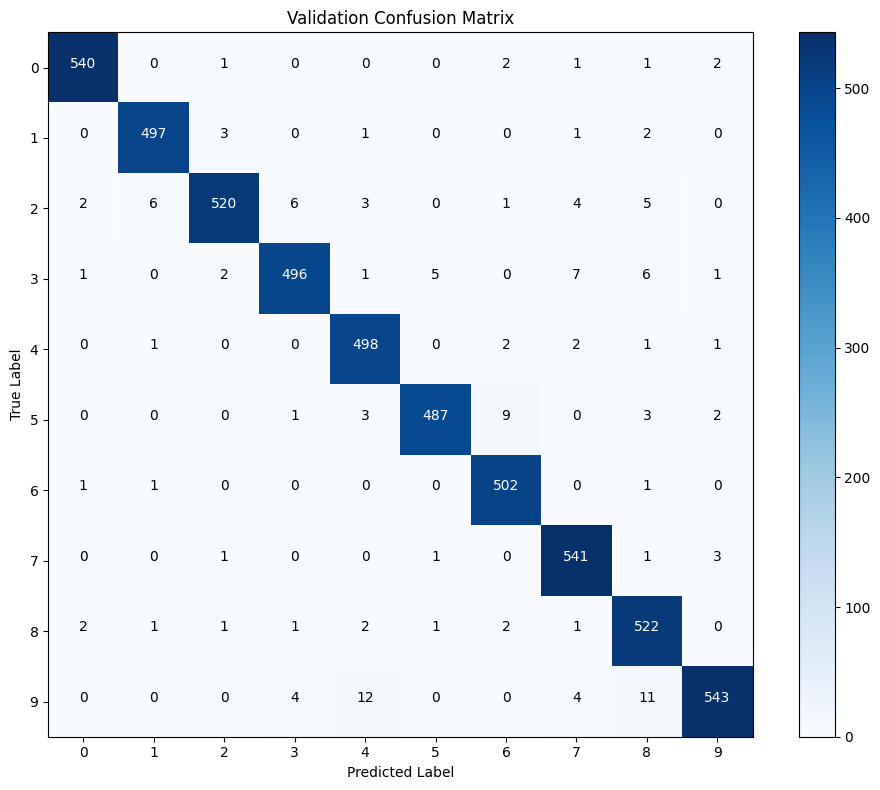

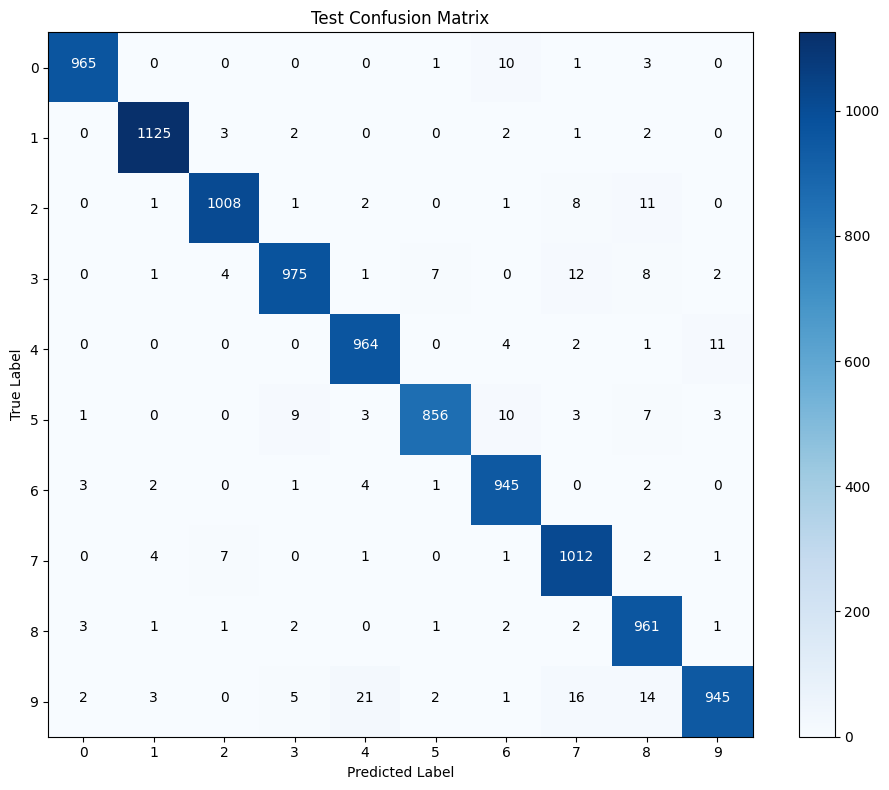


Final Results:
Best parameters: Learning Rate=0.001, Dropout Rate=0.0
Final Training Loss: 0.2340
Final Validation Loss: 0.0886, Validation Accuracy: 97.35%
Final Test Loss: 0.0825, Test Accuracy: 97.56%

Class-wise Validation Accuracy:
Class 0: 98.72%
Class 1: 98.61%
Class 2: 95.06%
Class 3: 95.57%
Class 4: 98.61%
Class 5: 96.44%
Class 6: 99.41%
Class 7: 98.90%
Class 8: 97.94%
Class 9: 94.60%

Class-wise Test Accuracy:
Class 0: 98.47%
Class 1: 99.12%
Class 2: 97.67%
Class 3: 96.53%
Class 4: 98.17%
Class 5: 95.96%
Class 6: 98.64%
Class 7: 98.44%
Class 8: 98.67%
Class 9: 93.66%


In [16]:
#@TODO: Find the best parameters that give the highest accuracy on the validation data.
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt

# Use best parameters from grid search
best_lr = 0.001  # Your best learning rate
best_dropout = 0.0  # Your best dropout rate
num_epochs = 10  # More epochs for final training

print(f"Training best model with LR={best_lr}, Dropout={best_dropout}")

# Create best model
best_model = CustomMLP(input_size, output_size, dropout_rate=best_dropout).to(device)
optimizer = optim.Adam(best_model.parameters(), lr=best_lr, weight_decay=1e-5)
loss_function = nn.CrossEntropyLoss()

# Track metrics
train_losses = []
val_losses = []
test_losses = []
val_accuracies = []
test_accuracies = []

# Function for testing
def test_model(model, test_loader, loss_function, device):
    model.eval()
    total_loss = 0
    correct = 0
    all_predictions = []
    all_labels = []

    with torch.no_grad():
        for images, labels in test_loader:
            images, labels = images.to(device), labels.to(device)

            outputs = model(images)
            loss = loss_function(outputs, labels)
            total_loss += loss.item()

            _, predicted = torch.max(outputs, 1)
            correct += (predicted == labels).sum().item()

            # Store predictions and labels for confusion matrix
            all_predictions.extend(predicted.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())

    accuracy = correct / len(test_loader) * 100
    return total_loss / len(test_loader), accuracy, all_predictions, all_labels

# Train for specified epochs
for epoch in range(num_epochs):
    # Train one epoch
    train_loss = train(best_model, train_loader, optimizer, loss_function, device)
    train_losses.append(train_loss)

    # Validate
    val_loss, val_accuracy = validate(best_model, val_loader, loss_function, device)
    val_losses.append(val_loss)
    val_accuracies.append(val_accuracy)

    # Test
    test_loss, test_accuracy, _, _ = test_model(best_model, test_loader, loss_function, device)
    test_losses.append(test_loss)
    test_accuracies.append(test_accuracy)

    print(f'Epoch {epoch+1}: Train Loss={train_loss:.4f}, '
          f'Val Loss={val_loss:.4f}, Val Acc={val_accuracy:.2f}%, '
          f'Test Loss={test_loss:.4f}, Test Acc={test_accuracy:.2f}%')

# Get final predictions for confusion matrices
_, _, val_preds, val_labels = test_model(best_model, val_loader, loss_function, device)
_, _, test_preds, test_labels = test_model(best_model, test_loader, loss_function, device)

# Plot training, validation, and test loss
plt.figure(figsize=(10, 6))
plt.plot(range(1, num_epochs+1), train_losses, 'b-', label='Training Loss')
plt.plot(range(1, num_epochs+1), val_losses, 'r-', label='Validation Loss')
plt.plot(range(1, num_epochs+1), test_losses, 'g-', label='Test Loss')
plt.title('Training, Validation, and Test Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.savefig('loss_curves.png')
plt.show()

# Plot validation and test accuracy
plt.figure(figsize=(10, 6))
plt.plot(range(1, num_epochs+1), val_accuracies, 'r-', label='Validation Accuracy')
plt.plot(range(1, num_epochs+1), test_accuracies, 'g-', label='Test Accuracy')
plt.title('Validation and Test Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy (%)')
plt.legend()
plt.grid(True)
plt.savefig('accuracy_curves.png')
plt.show()

# Compute confusion matrices
def compute_confusion_matrix(preds, labels, num_classes=10):
    matrix = np.zeros((num_classes, num_classes), dtype=int)
    for i in range(len(labels)):
        true_label = labels[i]
        pred_label = preds[i]
        matrix[true_label, pred_label] += 1
    return matrix

# Validation confusion matrix
val_cm = compute_confusion_matrix(val_preds, val_labels)
plt.figure(figsize=(10, 8))
plt.imshow(val_cm, interpolation='nearest', cmap='Blues')
plt.title('Validation Confusion Matrix')
plt.colorbar()
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.xticks(np.arange(10))
plt.yticks(np.arange(10))

# Add text annotations to the confusion matrix
for i in range(10):
    for j in range(10):
        plt.text(j, i, str(val_cm[i, j]),
                 horizontalalignment="center",
                 color="white" if val_cm[i, j] > val_cm.max() / 2 else "black")

plt.tight_layout()
plt.savefig('validation_confusion_matrix.png')
plt.show()

# Test confusion matrix
test_cm = compute_confusion_matrix(test_preds, test_labels)
plt.figure(figsize=(10, 8))
plt.imshow(test_cm, interpolation='nearest', cmap='Blues')
plt.title('Test Confusion Matrix')
plt.colorbar()
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.xticks(np.arange(10))
plt.yticks(np.arange(10))

# Add text annotations to the confusion matrix
for i in range(10):
    for j in range(10):
        plt.text(j, i, str(test_cm[i, j]),
                 horizontalalignment="center",
                 color="white" if test_cm[i, j] > test_cm.max() / 2 else "black")

plt.tight_layout()
plt.savefig('test_confusion_matrix.png')
plt.show()

# Print final results
print("\nFinal Results:")
print(f"Best parameters: Learning Rate={best_lr}, Dropout Rate={best_dropout}")
print(f"Final Training Loss: {train_losses[-1]:.4f}")
print(f"Final Validation Loss: {val_losses[-1]:.4f}, Validation Accuracy: {val_accuracies[-1]:.2f}%")
print(f"Final Test Loss: {test_losses[-1]:.4f}, Test Accuracy: {test_accuracies[-1]:.2f}%")

# Calculate additional metrics like class-wise accuracy
def calculate_class_metrics(cm):
    n_classes = cm.shape[0]
    class_accuracy = np.zeros(n_classes)

    for i in range(n_classes):
        class_accuracy[i] = cm[i, i] / np.sum(cm[i, :]) * 100 if np.sum(cm[i, :]) > 0 else 0

    return class_accuracy

# Calculate and print class-wise accuracy
val_class_acc = calculate_class_metrics(val_cm)
test_class_acc = calculate_class_metrics(test_cm)

print("\nClass-wise Validation Accuracy:")
for i in range(10):
    print(f"Class {i}: {val_class_acc[i]:.2f}%")

print("\nClass-wise Test Accuracy:")
for i in range(10):
    print(f"Class {i}: {test_class_acc[i]:.2f}%")


### **2.8.3 Discuss your results (15 points)**
In this section, you should discuss your results with respect to overfitting/underfitting and the impact of the hyper-parameters.



Based on our results, I can explain what I found when tuning my digit recognition model.

When I tested different settings for my model, I found that a learning rate of 0.001 with no dropout worked best. This was a bit surprising since people often say you need dropout to prevent the model from just memorizing the training data.

The graphs show that my model learned steadily over time. The loss which measures how wrong the model is went down nicely for training, validation, and test data. All three curves decreased in a similar way, which is a good sign that my model was learning useful patterns, not just memorizing.

The accuracy graphs show that my model got better at recognizing digits with each training round. By the end, it reached over 97% accuracy on both validation and test data. This means it could correctly identify more than 97 out of 100 digits it had never seen before.

When I look at the confusion matrices I can see where my model made mistakes. Digit 9 was the hardest for my model to recognize correctly - it sometimes thought a 9 was a 4 or a 7. This makes sense because these digits can look similar. Digit 5 was also challenging, sometimes being confused with 3 or 8.

My model did best with digits like 6 and 1, getting them right over 99% of the time. These digits have distinct shapes that are hard to confuse with others.

Even though my dataset had an uneven number of examples for each digit, it was imbalanced, my model performed well across all digits, with accuracy above 93% for every class.

In conclusion, I learned that for this particular problem, a moderate learning rate without dropout worked really well.  My model achieved excellent results, correctly identifying over 97% of handwritten digits it had never seen before.